## Загрузка библиотек   

In [114]:
import gdown
import numpy as np
import pandas as pd

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

from sklearn.feature_selection import SelectKBest # выбор признаков
from sklearn.feature_selection import chi2 # выбор по Хи квадрат

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


## Загрузка данных для работы

In [6]:
# загрузка данных
dataset = pd.read_csv(r"diabetes.csv")

In [23]:
file_id = '1LBDnhITL0Wqwp5G6M6IBI-SSz8BIoNec' # доступ для чтения

gdown.download(id=file_id)
#https://drive.google.com/file/d/1LBDnhITL0Wqwp5G6M6IBI-SSz8BIoNec/view

Downloading...
From: https://drive.google.com/uc?id=1LBDnhITL0Wqwp5G6M6IBI-SSz8BIoNec
To: c:\Users\V-C\Documents\tessst\ml\diabetes.csv
100%|██████████| 23.1k/23.1k [00:00<00:00, 2.88MB/s]


'diabetes.csv'

In [24]:
# загрузка данных
dataset = pd.read_csv(r"diabetes.csv")

In [25]:
dataset.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [27]:
dataset.isnull().mean() # проверка пропущенных значений
# Есть вероятность, что 0 повлияет на результат

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [ ]:
# TODO проверка на 0 значения

In [29]:
# привести наименования к нижнему регистру, пробелы к _
dataset.columns = [col.lower() for col in dataset.columns]
dataset.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

In [30]:
# Разделение X (data features) и y (outcome)
# Разделение нужно для задачи классификации

X = dataset.drop(columns=['outcome'])
y = dataset['outcome']

## EDA - исследовательский анализ данных 

(какие признаки, квантили/квартили, пустые ячейки, выбросы)

In [18]:
px.box(X) # построить распределение для всех числовых переменных

In [11]:
X.describe(percentiles=[0.1, 0.25,0.5, 0.75, 0.9]).T

,count,mean,std,min,10%,25%,50%,75%,90%,max
pregnancies,768.0,3.845052,3.369578,0.000,0.000,1.00000,3.0000,6.00000,9.0000,17.00
glucose,768.0,120.894531,31.972618,0.000,85.000,99.00000,117.0000,140.25000,167.0000,199.00
bloodpressure,768.0,69.105469,19.355807,0.000,54.000,62.00000,72.0000,80.00000,88.0000,122.00
skinthickness,768.0,20.536458,15.952218,0.000,0.000,0.00000,23.0000,32.00000,40.0000,99.00
insulin,768.0,79.799479,115.244002,0.000,0.000,0.00000,30.5000,127.25000,210.0000,846.00
bmi,768.0,31.992578,7.884160,0.000,23.600,27.30000,32.0000,36.60000,41.5000,67.10
diabetespedigreefunction,768.0,0.471876,0.331329,0.078,0.165,0.24375,0.3725,0.62625,0.8786,2.42
age,768.0,33.240885,11.760232,21.000,22.000,24.00000,29.0000,41.00000,51.0000,81.00


## Подготовка данных

In [32]:
# нормализация
# MinMax
# StandardScalar
# Robust
scalar_test = StandardScaler()
features_arr = scalar_test.fit_transform(X, y)
print(features_arr)
normalised_X = pd.DataFrame(features_arr, columns=X.columns)
print(normalised_X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
     pregnancies   glucose  bloodpressure  skinthickness   insulin       bmi  \
0       0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1      -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2       1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3      -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4      -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   
..           ...       ...  

In [13]:
px.box(normalised_X)

In [33]:
minmax_test = MinMaxScaler()
features_arr_min_max = minmax_test.fit_transform(X, y) # результат np array
print(features_arr_min_max)
normalised_min_max_X = pd.DataFrame(features_arr_min_max, columns=X.columns)
print(normalised_min_max_X)

[[0.35294118 0.74371859 0.59016393 ... 0.50074516 0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 ... 0.39642325 0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 ... 0.34724292 0.25362938 0.18333333]
 ...
 [0.29411765 0.6080402  0.59016393 ... 0.390462   0.07130658 0.15      ]
 [0.05882353 0.63316583 0.49180328 ... 0.4485842  0.11571307 0.43333333]
 [0.05882353 0.46733668 0.57377049 ... 0.45305514 0.10119556 0.03333333]]
     pregnancies   glucose  bloodpressure  skinthickness   insulin       bmi  \
0       0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1       0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2       0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3       0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4       0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   
..           ...       ...            ...            ...       ...       ...

In [34]:
px.box(normalised_min_max_X)

In [35]:
robust_test = RobustScaler()
features_arr_robust = robust_test.fit_transform(X, y) # результат np array
print(features_arr_robust)
normalised_robust_X = pd.DataFrame(features_arr_robust, columns=X.columns)
print(normalised_robust_X)

[[ 0.6         0.75151515  0.         ...  0.17204301  0.66535948
   1.23529412]
 [-0.4        -0.77575758 -0.33333333 ... -0.58064516 -0.05620915
   0.11764706]
 [ 1.          1.6        -0.44444444 ... -0.93548387  0.78300654
   0.17647059]
 ...
 [ 0.4         0.0969697   0.         ... -0.62365591 -0.33333333
   0.05882353]
 [-0.4         0.21818182 -0.66666667 ... -0.20430108 -0.06143791
   1.05882353]
 [-0.4        -0.58181818 -0.11111111 ... -0.17204301 -0.1503268
  -0.35294118]]
     pregnancies   glucose  bloodpressure  skinthickness   insulin       bmi  \
0            0.6  0.751515       0.000000        0.37500 -0.239686  0.172043   
1           -0.4 -0.775758      -0.333333        0.18750 -0.239686 -0.580645   
2            1.0  1.600000      -0.444444       -0.71875 -0.239686 -0.935484   
3           -0.4 -0.678788      -0.333333        0.00000  0.499018 -0.419355   
4           -0.6  0.484848      -1.777778        0.37500  1.080550  1.193548   
..           ...       ...   

In [36]:
px.box(normalised_robust_X)

In [40]:
TEST_SIZE_DEFAULT = 0.2
TEST_SIZE = 0.25
RANDOM_SEED = 1234 
NEED_SHUFFLE = True
# Разделение на тренировочную и тестовую для классификации
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE_DEFAULT, random_state=RANDOM_SEED, shuffle=NEED_SHUFFLE)
# Разделение для сравнения
X_train25, X_test25, y_train25, y_test25 = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_SEED, shuffle=NEED_SHUFFLE)

## Работа с KNN

In [50]:
def knn_classifier_wrapper(x_train, y_train, k, knn_model, cv=5):
    knn_model.set_params(n_neighbors=k)
    return knn_model, cross_val_score(knn_model, x_train, y_train)

In [51]:
# Примените алгоритм KNN (k-ближайших соседей) для данных

# Построение модели k-Nearest Neighbors (kNN), загрузить классификатор
knn_model = KNeighborsClassifier()

In [58]:
# Рассчитайте модель kNN для k = 5, 10, 15, 20, 25.
MODEL_PARAMS = {'n_neighbors': np.arange(5, 26, 5)}
print(MODEL_PARAMS)

best_score = 0
best_model = 0

for k in MODEL_PARAMS['n_neighbors']:
    knn_set_model, scores = knn_classifier_wrapper(X_train, y_train, k, knn_model)
    print(f"k: {k}, по scores - {scores}")
    avg_score = np.mean(scores)
    if avg_score > best_score:
        best_score = avg_score
        best_n_neighbors = k
        best_model = knn_set_model

print(f"Лучший k по scores - {best_n_neighbors}")

{'n_neighbors': array([ 5, 10, 15, 20, 25])}
k: 5, по scores - [0.72357724 0.70731707 0.66666667 0.69918699 0.73770492]
k: 10, по scores - [0.74796748 0.74796748 0.72357724 0.74796748 0.79508197]
k: 15, по scores - [0.77235772 0.73170732 0.68292683 0.7398374  0.78688525]
k: 20, по scores - [0.74796748 0.75609756 0.71544715 0.74796748 0.76229508]
k: 25, по scores - [0.70731707 0.73170732 0.70731707 0.7398374  0.74590164]
Лучший k по scores - 10


In [80]:
# c выбором лучших ячеек
# Выбор лучших признаков
selector = SelectKBest(chi2, k=2)
X_best25_2 = selector.fit_transform(X_train25, y_train25)
X_best25_2_df = pd.DataFrame(X_best25_2)

In [98]:
from copy import copy
# Укажите объем тестового набора данных равным 25% от общего количества данных

# Рассчитайте модель kNN для k = 5, 10, 15, 20, 25.
MODEL_PARAMS = {'n_neighbors': np.arange(5, 26, 5)}
print(MODEL_PARAMS)

best_score25 = 0

for k in MODEL_PARAMS['n_neighbors']:
    knn_set_model25, scores = knn_classifier_wrapper(X_best25_2_df, y_train25, k, knn_model)
    print(f"k: {k}, по scores - {scores}")
    avg_score = np.mean(scores)
    if avg_score > best_score:
        best_score25 = avg_score
        best_n_neighbors25 = k
        best_model25 = copy.deepcopy(knn_set_model25) # доделать для лучшей

print(f"Лучший k по scores - {best_n_neighbors}")

{'n_neighbors': array([ 5, 10, 15, 20, 25])}
k: 5, по scores - [0.69827586 0.70434783 0.68695652 0.76521739 0.80869565]
k: 10, по scores - [0.73275862 0.70434783 0.65217391 0.74782609 0.76521739]
k: 15, по scores - [0.74137931 0.68695652 0.67826087 0.74782609 0.76521739]
k: 20, по scores - [0.70689655 0.71304348 0.66956522 0.73913043 0.79130435]
k: 25, по scores - [0.75       0.70434783 0.69565217 0.74782609 0.79130435]
Лучший k по scores - 10


In [84]:
def plot_decision_boundary(model, X, y, h = .02):
    '''
    Функция для построения графиков решающих областей 2D для бинарной классификации
    @param model - модель классификации
    @param X - матрица признаков
    @param y - класс
    @param h - шаг сетки
    '''
    # Функция для построения графиков решающих областей
    cmap = plt.cm.RdYlBu # отвечает за цвета, матрицу
    markers = 's^o'  # Маркеры для классов

    # Обучение модели
    model.fit(X, y)

    # Размеры графика
    # print(X)
    # print(y)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Предсказание значений на сетке
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Построение контуров
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap)

    # Разметка классов
    for i, c in zip(range(2), markers):
        plt.scatter(X[y == i][:, 0], X[y == i][:, 1], marker=c, label=f"Class {i}")

    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2')
    plt.title(f'Результат классификации ({type(model).__name__})')
    plt.legend()
    plt.show()


In [85]:
X_train25.to_numpy()

array([[2.00e+00, 1.97e+02, 7.00e+01, ..., 3.05e+01, 1.58e-01, 5.30e+01],
       [5.00e+00, 9.70e+01, 7.60e+01, ..., 3.56e+01, 3.78e-01, 5.20e+01],
       [2.00e+00, 1.46e+02, 7.00e+01, ..., 2.80e+01, 3.37e-01, 2.90e+01],
       ...,
       [8.00e+00, 1.76e+02, 9.00e+01, ..., 3.37e+01, 4.67e-01, 5.80e+01],
       [0.00e+00, 1.61e+02, 5.00e+01, ..., 2.19e+01, 2.54e-01, 6.50e+01],
       [5.00e+00, 1.17e+02, 8.60e+01, ..., 3.91e+01, 2.51e-01, 4.20e+01]])

In [99]:
knn_best_model25, scores = knn_classifier_wrapper(X_best25_2_df, y_train25, 10, knn_model)
plot_decision_boundary(knn_best_model25, X_best25_2, y_train25.to_numpy())
# доработать функцию

MemoryError: Unable to allocate 6.32 GiB for an array with shape (424000000, 2) and data type float64

In [103]:
# Укажите score модели (метрики) и постройте визуализацию обученной классификации для указанных k

def model_report(model, X_test, y_test, average='weighted'):
    # Проведите тестирование модели
    # Делаем предсказания на тестовом наборе
    y_pred = model.predict(X_test)

    # Оцениваем точность модели
    accuracy_eff = accuracy_score(y_test, y_pred)
    print(f"Правильность (accuracy) модели: {accuracy_eff}")

    precision_eff = precision_score(y_test, y_pred, average=average)
    print(f"Точность (precision) модели: {precision_eff}")

    recall_eff = recall_score(y_test, y_pred, average=average)
    print(f"Полнота (recall) модели: {recall_eff}")

    f1_eff = f1_score(y_test, y_pred, average=average)
    print(f"F1 мера модели: {f1_eff}")


In [106]:
knn_model_scores = KNeighborsClassifier()
knn_best_20, scores_20 = knn_classifier_wrapper(X_train, y_train, 10, knn_model_scores)

In [109]:
knn_best_20.fit(X_test, y_test)
# получим отчет для knn k=10, test 20%
model_report(knn_best_20, X_test, y_test)

Правильность (accuracy) модели: 0.7987012987012987
Точность (precision) модели: 0.801205600207415
Полнота (recall) модели: 0.7987012987012987
F1 мера модели: 0.7882613510520488


In [110]:
knn_model_scores_25 = KNeighborsClassifier()
knn_best_25, scores_25 = knn_classifier_wrapper(X_train25, y_train25, 15, knn_model_scores_25)

In [111]:
knn_best_25.fit(X_test25, y_test25)
# получим отчет для knn k=15, test 25%
model_report(knn_best_25, X_test25, y_test25)

Правильность (accuracy) модели: 0.78125
Точность (precision) модели: 0.7784641000649772
Полнота (recall) модели: 0.78125
F1 мера модели: 0.7752685546875


## Работа с множественной линейной регрессией

### Подготовка к решению задачи

In [127]:
# {SkinThickness, BMI} и Y = {Insulin} из датасета

X_regr = dataset[['skinthickness', 'bmi']]
y_regr = dataset['insulin']

In [ ]:
# TODO провести исследование

<Axes: xlabel='skinthickness', ylabel='insulin'>

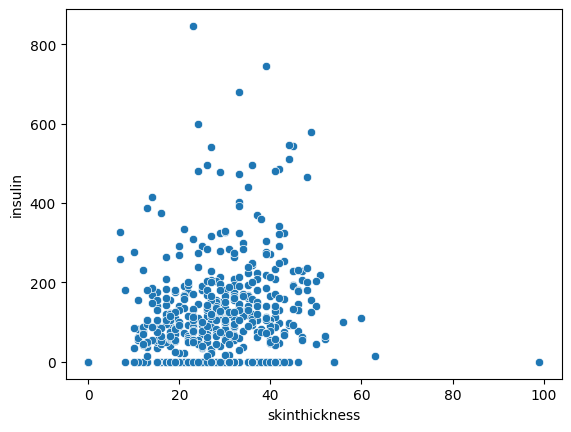

In [136]:
sns.scatterplot(x=dataset['skinthickness'], y=dataset['insulin'])


<Axes: xlabel='bmi', ylabel='insulin'>

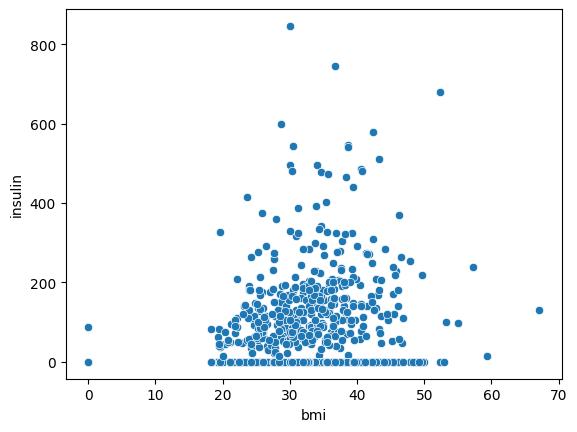

In [137]:
sns.scatterplot(x=dataset['bmi'], y=dataset['insulin'])

<Axes: xlabel='mean', ylabel='insulin'>

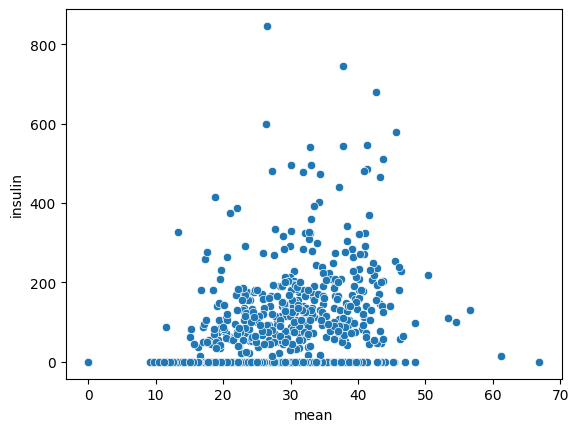

In [143]:
dataset['mean'] = (dataset['bmi'] + dataset['skinthickness'])/2
sns.scatterplot(x=dataset['mean'], y=dataset['insulin'])

In [128]:
X_regr

,skinthickness,bmi
0,35,33.6
1,29,26.6
2,0,23.3
3,23,28.1
4,35,43.1
...,...,...
763,48,32.9
764,27,36.8
765,23,26.2
766,0,30.1


In [125]:
# разбиваем dataset на test / train
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_regr, y_regr, test_size = TEST_SIZE, random_state = RANDOM_SEED)

In [129]:
model_regr = LinearRegression()
model_regr.fit(X_train_r, y_train_r)

LinearRegression()

In [130]:
X_train_r.dtypes

skinthickness      int64
bmi              float64
dtype: object

In [131]:
# получаем метрику качества модели на test выборке
model_regr.score(X_train_r, y_train_r)

0.1981194399422609

In [132]:
# запускаем прогноз значений целевой функции y от x
y_pred = model_regr.predict(X_test_r)

In [134]:
# выводим предсказанное , реальное значение в тестовой выборке и разницу между ними
d = {'y_pred': y_pred, 'y_test': y_test_r, 'diff': np.abs(y_test_r - y_pred)}
pd.DataFrame(d)

,y_pred,y_test,diff
200,67.110671,0,67.110671
40,97.350096,70,27.350096
630,13.945078,0,13.945078
356,145.797812,167,21.202188
305,138.251305,105,33.251305
...,...,...,...
411,113.716149,176,62.283851
330,74.143671,0,74.143671
282,64.344121,155,90.655879
112,125.603961,37,88.603961


## Работа с Алгоритмом 3 (например, DecisionTreeClassifier)